In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris() 

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int)

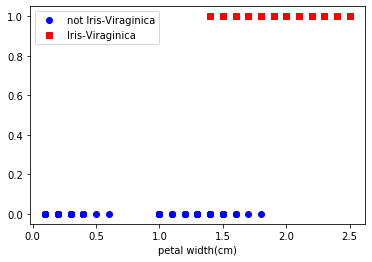

In [7]:
plt.plot(X[y==0],y[y==0],'bo',label='not Iris-Viraginica')
plt.plot(X[y==1],y[y==1],'rs',label='Iris-Viraginica')
plt.xlabel('petal width(cm)')
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='lbfgs')
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
log_reg.coef_ , log_reg.intercept_

(array([[4.3330846]]), array([-7.1947083]))

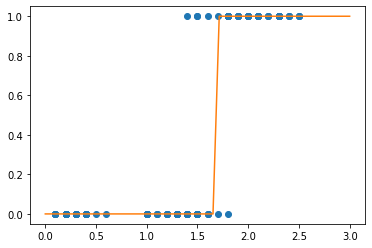

In [10]:
x=[[i] for i in np.linspace(0,3)]
plt.plot(X,y,'o')
plt.plot(x,log_reg.predict(x))

In [11]:
log_reg.score(X, y)

0.96

결론 : 꽃잎의 폭이 길수록 iris-Virginica일 확률이 높다.

In [12]:
from sklearn.svm import SVC

In [13]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [14]:
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [15]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
x0 = np.linspace(0, 6, 200)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[0]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    print(svs)
    plt.scatter(svs[:, 0], svs[:, 1],s=180) 
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=1)
    plt.plot(x0, gutter_down, "k--", linewidth=1)

[[1.9 0.4]
 [3.  1.1]]


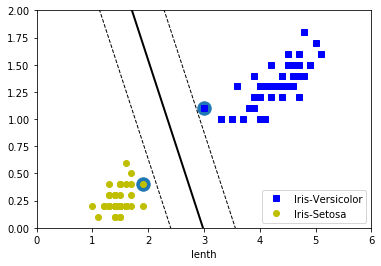

In [49]:
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor") 
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")   
plt.xlabel("lenth")
plt.legend()
plt.axis([0, 6, 0, 2])


plt.show()

결론 : 꽃잎의 길이가 3이상이면 versicolor 이다